# $\sin^{2}(\theta_{W})$ Running Plot

Kurtis Bartlett

2017/3/15

Ipython notebook for generating the Marciano $\sin^{2}(\theta_{W})$ running with $Q^{2}$ plot.

Ref: A. Czarnecki and W. J. Marciano, Polarized Moller Scattering Asymmetries, Int. J. Modern Phys. A15, 2365 (2000)

In [1]:
# Import necessary packages and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
# Use text and computer modern for text formating
pp.rcParams["text.usetex"] = "True"
pp.rcParams["font.family"] = "serif"
pp.rcParams["font.serif"] = "Computer Modern Roman"
pp.rcParams["font.sans-serif"] = "Computer Modern Sans serif"

In [3]:
# Keep matplotlib plots inline
%matplotlib inline

In [4]:
pp.style.use('seaborn-white')
sns.set_palette("muted")
plot_size = 6*np.array([1.0,(2.0/(1.0+np.sqrt(5.0)))]) #Use Golden ratio as aspect ratio for plots

In [5]:
# Constants
pi = np.pi
alpha = (1.0/137.035999139) # Fine structure constant Ref: PDG 2016
sin2thetaw = 0.22336 # On-shell (tree level) SM value of sin^2(theta_w) Ref: PDG 2016
cos2thetaw = 0.77664 # On-shell (tree level) SM value of cos^2(theta_w) calculated from sin2theta_w
sin2thetawmzmsb = 0.23129 # Value of sin^2(theta_w) evaluated at the Z-pole. Ref: PDG 2016

mw = 80.385 # Mass of W^{+-} boson [GeV/c^2] Ref: PDG 2016
mz = 91.1876 # Mass of Z boson [GeV/c^2] Ref: PDG 2016

# Fermion mass and charge
m_f = np.array([0.5109989461, # Electron
                2.2, # Up
                4.7, # Down
                96.0, # Strange
                105.6583745, # Muon
                1270.0, # Charm
                1776.86, # Tau
                4180.0, # Bottom
               ])/1000.0 # [MeV/c^2]->[GeV/c^2]

Q_f = np.array([-1.0, # Electron
              (2.0/3.0), # Up
              (-1.0/3.0), # Down
              (-1.0/3.0), # Strange
              -1.0, # Muon
              (2.0/3.0), # Charm
              (-1.0/3.0), # Bottom
              (2.0/3.0)]) # Top

T_f = np.array([-0,5, # Electron
                0.5, # Up
                -0.5, # Down
                -0.5, # Strange
                -0.5, # Muon
                0.5, # Charm
                -0.5, # Tau
                -0.5]) # Bottom

In [6]:
# Define functions
def kappa_f(qq):
    'Fermion Loop Function'
    
    sum_f = 0.0
    fterm_one = 0.0
    fterm_two = 0.0
    for i in range(len(m_f)):
        'Loop over fermion masses'
        z_f = (m_f[i]*m_f[i])/qq
        
        p_f = np.sqrt(1.0 + 4.0*z_f)
        
        fterm_one = (T_f[i]*Q_f[i] - 2.0*sin2thetaw*Q_f[i]*Q_f[i])
        
        fterm_two = np.log((m_f[i]*m_f[i])/(mz*mz)) - (5.0/3.0)+ 4.0*z_f + (1.0 - 2.0*z_f)*p_f*np.log((p_f + 1.0)/(p_f - 1.0))
        
        sum_f = sum_f + fterm_one*fterm_two
        
    kappa = 1.0 - ((alpha)/(2.0*pi*sin2thetaw))*(sum_f/3.0)
    return kappa

def kappa_b(qq):
    'Boson Loop Function'

    z = (mw*mw)/qq
    p = np.sqrt(1.0 + 4.0*z)
    
    term_one = ((-42.0*cos2thetaw + 1.0)/12.0)*np.log(cos2thetaw)
    
    term_two = (1.0/18.0)
    
    term_three = (-0.5*p*np.log((p + 1.0)/(p - 1.0))-1.0)*(cos2thetaw*(7.0-4.0*z) + (1.0/6.0)*(1.0 + 4.0*z))
    
    term_four = -1.0*z*((3.0/4.0) - z + (z - (3.0/2.0))*p*np.log((p+1.0)/(p-1.0)) + z*(2.0 - z)*np.log((p + 1.0)/(p - 1.0))*np.log((p + 1.0)/(p - 1.0)))
    
    kappa = 1.0 - (alpha/(2.0*pi*sin2thetaw))*(term_one + term_two + term_three + term_four)
    return kappa

def sin2theta_w(qq):
    'Combination of Fermion and Boson Term'
    total = (kappa_f(qq) + kappa_b(qq))*sin2thetawmzmsb
    return total

In [7]:
q = np.linspace(1e-1,1e4, 1e4)
qq = np.square(q)

In [8]:
fermion = np.zeros(len(q))
boson = np.zeros(len(q))
total = np.zeros(len(q))
for i in range(len(q)):
    fermion[i] = kappa_f(qq[i])*sin2thetawmzmsb
    boson[i] = kappa_b(qq[i])*sin2thetawmzmsb
    total[i] = sin2theta_w(qq[i])

In [9]:
boson[:10]

array([ -3.79192676e+03,  -3.10919982e+01,  -8.35442984e+00,
        -3.70225784e+00,  -2.01238304e+00,  -1.21458592e+00,
        -7.75822078e-01,  -5.09006543e-01,  -3.34756938e-01,
        -2.14726103e-01])

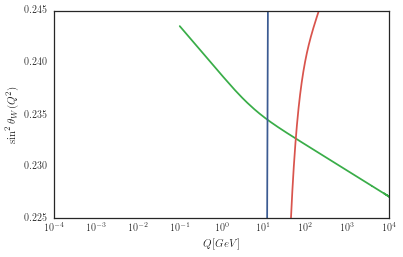

In [10]:
pp.figure(figsize=plot_size)
pp.plot(q,fermion, color=sns.xkcd_rgb['medium green'])
pp.plot(q,boson, color=sns.xkcd_rgb['pale red'])
pp.plot(q,total, color=sns.xkcd_rgb['denim blue'])
#pp.legend(loc='lower left', fontsize=11)
pp.xscale('log')
pp.xlim(1e-4,1e4)
pp.ylim(0.225,0.245)
pp.xlabel('$Q [GeV]$')
pp.ylabel('$\\sin^{2}\\theta_{W}(Q^{2})$')
pp.show()